<h1><center><span style="color:#6b5b95">Car Price Prediction</span></center></h1>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# import of required modules 
import pandas as pd
import numpy as np
# plots
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Split Dataset
from sklearn.model_selection import train_test_split
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Stats model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# R2 Score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Problem Statement
A Chinese company who wants to enter US Automobile market, have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, Company want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

### Business Goal 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

# Data Sourcing 
### Load the Dataset

In [2]:
car_dataset = pd.read_csv('CarPrice_Assignment.csv',encoding='ISO-8859-1')

In [3]:
# Check the first few records
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Understand Dataset

In [4]:
# Check Data Types of all variables
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Lets check some stats about the dataset
car_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Observation:
- We can see that all variables have almost similar mean and median. Hence we don't need to remove any outliers.Also we will be using Min-Max Scaling which will automatically take care of Outliers
- Also, we can see from the dataset, The <b>Target or Dependent Variable 'Price'</b> is also properly distributed

In [6]:
# Check unique values in each columns
car_dataset.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
# Categorical Variables
car_dataset[car_dataset.dtypes[car_dataset.dtypes==object].index.to_list()].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### Lets Split CarName into Company and CarModel

In [8]:
car_dataset['Company'] = car_dataset['CarName'].apply(lambda x: x.split(' ')[0])
car_dataset['CarModel'] = car_dataset['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))
car_dataset.drop('CarName',axis=1,inplace=True)
car_dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [9]:
# Lowercase Car Company names
car_dataset['Company']=car_dataset['Company'].str.lower()

In [10]:
# Check different Companies
car_dataset['Company'].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
maxda           2
vw              2
renault         2
porcshce        1
mercury         1
toyouta         1
vokswagen       1
Name: Company, dtype: int64

In [11]:
# Correct Spelling Mistake in Car Company names
car_dataset['Company'] = car_dataset['Company'].apply(lambda x: x.replace('vw','volkswagen').replace('maxda','mazda').replace('toyouta','toyota').replace('vokswagen','volkswagen').replace('porcshce','porsche'))
car_dataset['Company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: Company, dtype: int64

In [12]:
# Numeric Variables
car_dataset[car_dataset.dtypes[(car_dataset.dtypes!=object)].index.to_list()].head(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


## Visualizing the Data
- Lets find out if there is any Multicollinearity between Independent variables
- Also lets find out which dependent variables have strong association with independent variable Price

### Visualizing Target Variable Price

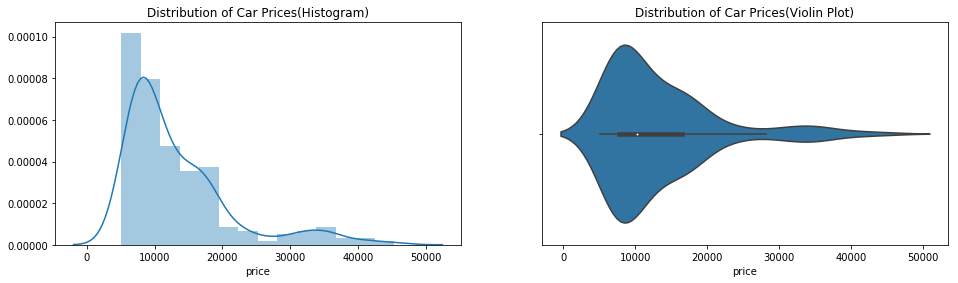

In [13]:
plt.figure(figsize=[16,9])
plt.subplot(2,2,1)
# Plot dist plot of car prices
sns.distplot(car_dataset.price)
plt.title("Distribution of Car Prices(Histogram)")
plt.subplot(2,2,2)
# Violin Plot of price
sns.violinplot(car_dataset.price)
plt.title("Distribution of Car Prices(Violin Plot)")
plt.show()

### Observation
<div class="alert alert-block alert-success">Most of the Car Prices are ditributed around 10000USD. 

### Average Car Prices in each company

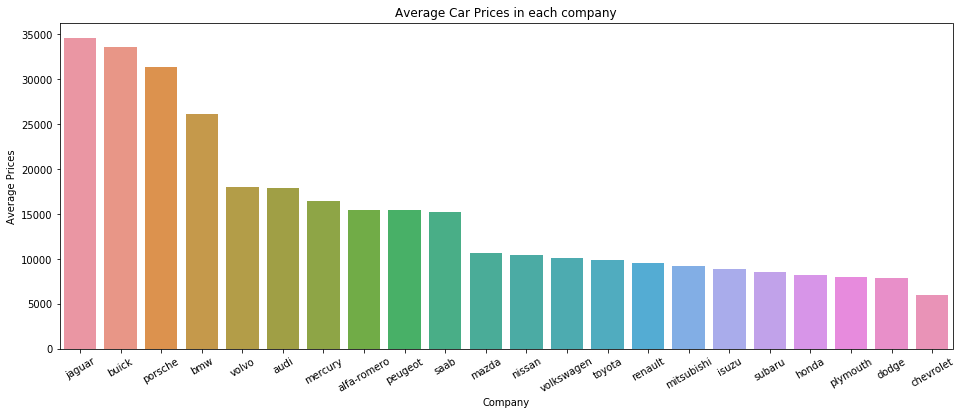

In [14]:
# Compute Average of price per company
avg_price_company = car_dataset.groupby('Company')['price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=[16,6])
# Draw a Bar plot of averages
sns.barplot(data=avg_price_company,x='Company',y='price')
plt.xticks(rotation=30)
plt.ylabel("Average Prices")
plt.title("Average Car Prices in each company")
plt.show()

### Observation
- We can see that cars of jaguar, buick, porsche,bmw have higher average prices when compared among others. 
- Also from volvo till saab, the average prices dip which depicts they usually sell mid variant cars. 
- Again The from mazda till chevrolet, the car prices dip further, which depicts they most likely sell budget variant cars.
- Hence we can segment these cars into Luxury, Mid variant, and budget friendly types of cars based on avg price

### Derived Metrics

In [15]:
# Create a temo merged dataframe containing average price
temp = pd.merge(left=car_dataset,right=avg_price_company,on='Company',how='inner')
# Segment the average prices into 0,10654,20000, max
car_dataset['segment']=pd.cut(temp['price_y'],bins=[0,10654,20000,avg_price_company.price.max()],labels=['Budget','Mid variant','Luxury'])

In [16]:
# print head
car_dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel,segment
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,Mid variant
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,Mid variant
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,Mid variant
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls,Mid variant
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,Mid variant


### Visualizing Numeric Variables

In [17]:
# Lets store it in a list
# we are ignoring Car ID as its a primary key and symboling is categorical
numeric_variables = car_dataset.dtypes[car_dataset.dtypes!=object].index.to_list()[2:-1]
numeric_variables

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

### Correlation Matrix

In [18]:
# Taking absolute value of correlation as we are not worried about sign(+ve and -ve correlation)
corr_matrix = car_dataset[numeric_variables].corr().abs()
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012,0.553173
stroke,0.160959,0.129533,0.182942,0.055307,0.168790,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,0.204326,0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,0.108802,0.750739,0.809769,0.573677,0.080940,0.204326,1.000000,0.131073,0.801456,0.770544,0.808139


### Heatmap of Correlation Matrix

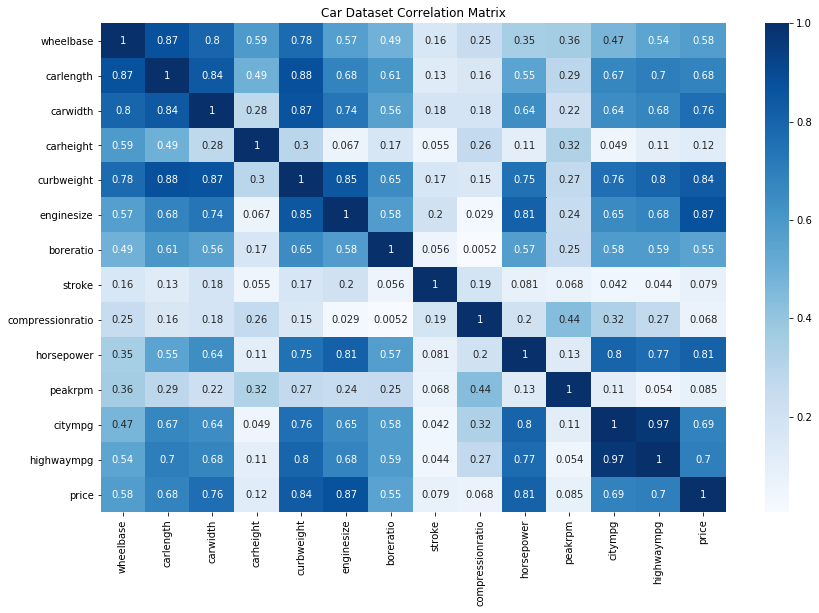

In [19]:
# Plot heat map using seaborn
plt.figure(figsize=[14,9])
sns.heatmap(corr_matrix,annot=True,cmap='Blues')
plt.title("Car Dataset Correlation Matrix")
plt.show()

### Top highly correlated variables

In [20]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
high_corr_variables = [column for column in upper.columns if any(upper[column] > 0.8) and column!='price']
high_corr_variables

['carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

### Top highly correlated variables with Price

In [21]:
# Get the row where correlation values are present for price
highcorr_vars={i:corr_matrix.loc[i,'price'] for i in corr_matrix.index.to_list()}
# Print the dictionary of highly correlated values
{k: v for k, v in sorted(highcorr_vars.items(), key=lambda item: item[1],reverse=True)}

{'price': 1.0,
 'enginesize': 0.8741448025245113,
 'curbweight': 0.8353048793372965,
 'horsepower': 0.8081388225362213,
 'carwidth': 0.7593252997415122,
 'highwaympg': 0.6975990916465568,
 'citympg': 0.6857513360270401,
 'carlength': 0.6829200156779612,
 'wheelbase': 0.57781559829215,
 'boreratio': 0.5531732367984439,
 'carheight': 0.11933622657049443,
 'peakrpm': 0.0852671502778568,
 'stroke': 0.07944308388193085,
 'compressionratio': 0.06798350579944264}

<a id =4> </a>
### Observation
- 'curbweight', 'carwidth','enginesize','horsepower' are highly releated to dependent variable Price
- 'carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg' are variables with high correlation values

### Pair-Plot of Numeric variables against Price
<div class="alert alert-block alert-info">Lets check which variables follow linearity trend with Price

#### First Group of seven

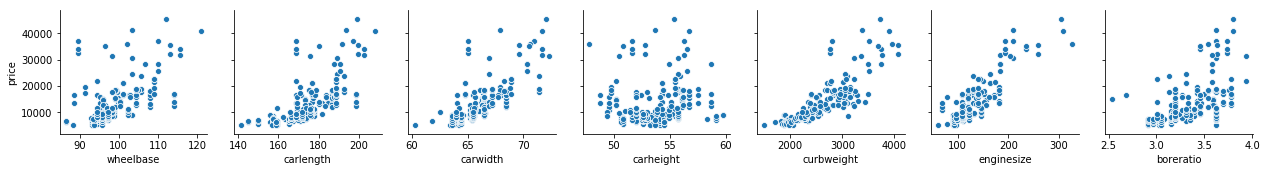

In [22]:
# Plot first seven 
sns.pairplot(car_dataset[numeric_variables],x_vars=numeric_variables[:len(numeric_variables)//2],y_vars='price')
plt.show()

<a id =1> </a>
### Observation
Following variables follow a linear relationship with price
1. carlength
2. carwidth
3. curbweight
4. enginesize
5. boreratio
3. wheelbase

#### Second group of six

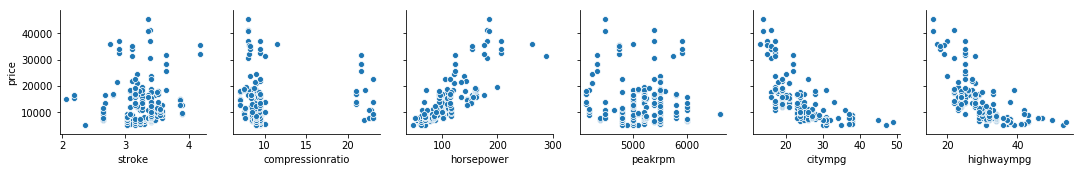

In [23]:
# plot second 6
sns.pairplot(car_dataset[numeric_variables],x_vars=numeric_variables[len(numeric_variables)//2:-1],y_vars='price')
plt.show()

<a id =5> </a>
### Observation
Following variables follow a linear relationship with price
1. horsepower
2. citympg 
3. highwaympg

## Visualizing Categorical Variables
<div class="alert alert-block alert-info">Lets plot Boxplots to check the distribution of price for each category to find if there is any correlation

In [24]:
# Lets store the categorical variables in a list
# We have ignored CarName since its spilted to company and CarModel. Also we are ignoring carModel
cat_variables = car_dataset.dtypes[(car_dataset.dtypes==object)].index.to_list()[0:-1]
# Adding Symbolic as categorical
cat_variables.append('symboling')
cat_variables.append('segment')
cat_variables

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company',
 'symboling',
 'segment']

### First Group of Six

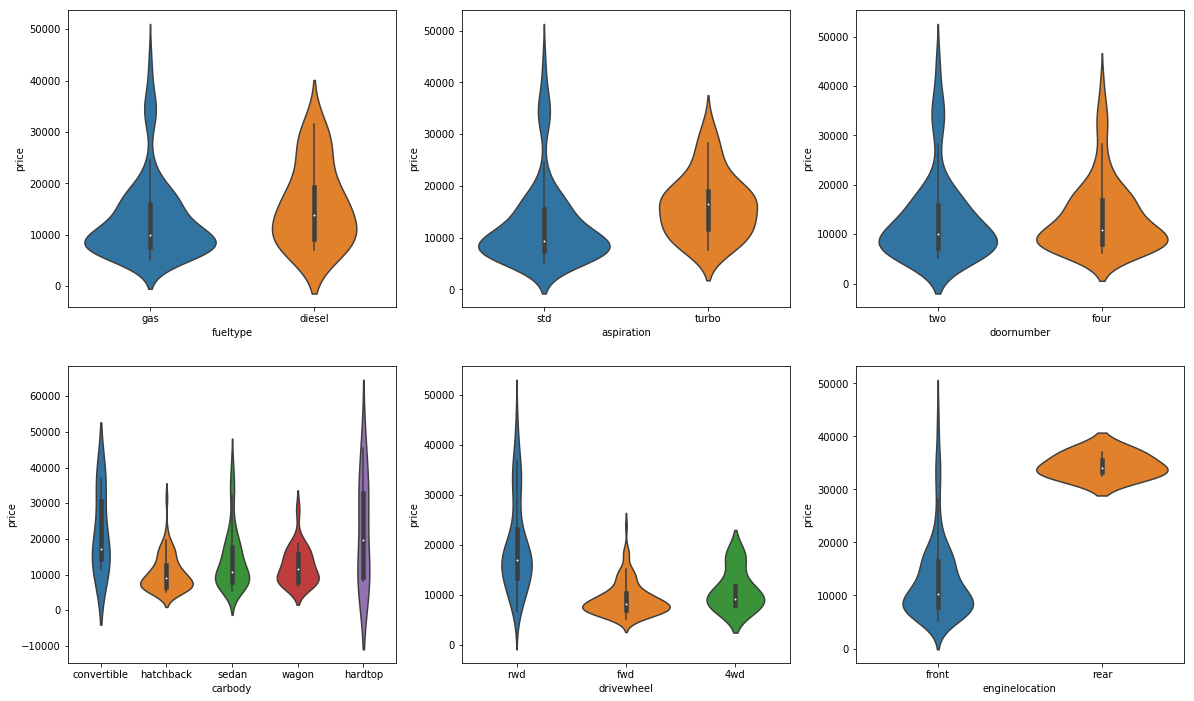

In [25]:
plt.figure(figsize=(20, 12))
plt.title("First group of Six")
# From 1st till 6th variable
for i in range(0,6):   
    plt.subplot(2,3,i+1)
    sns.violinplot(x = cat_variables[i], y = 'price', data = car_dataset)
plt.show()

<a id =2> </a>
### Observation 
- Fuel Type: Diesel cars have more prices than gas. But more number of people have bought gas fueled cars at lower ranges. Hence correlation is there
- Aspiration: Turbo type of aspiration has more prices than Standard. Hence correlation is there
- Doornumber: Not much correlation with price
- carbody: Prices are more for hardtop and convertible, but for others its less. The correlation between hatchback, sedan, wagon is almost similar. Hence we can try to combine to check if it improves accuracy
- More number of people have bought forward wheel drive cars at lower prices. But rear wheel drives have been bought for higher proces.Hence correlation is there
- enginelocation: engines at Rear have more prices than front. Hence lot of correlation

### Second group of Five

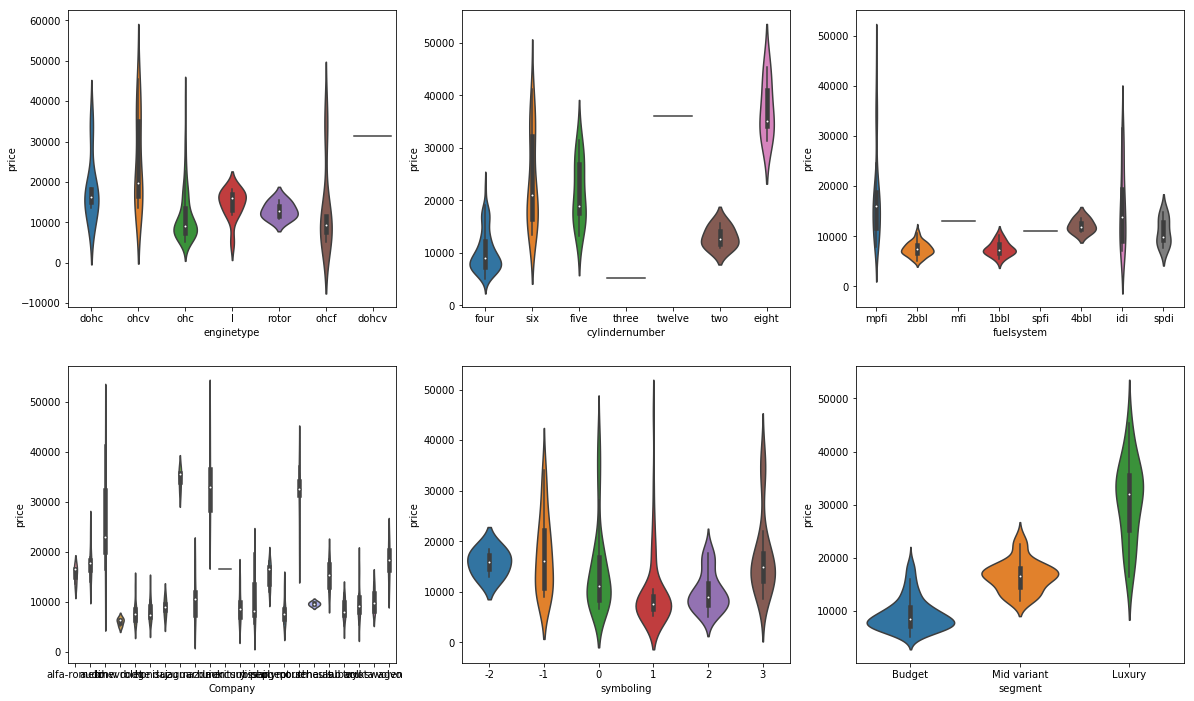

In [26]:
plt.figure(figsize=(20, 12))
plt.title("Second group of Five")
# from 2nd till last variable
for i in range(6,12):   
    plt.subplot(2,3,i-6+1)
    sns.violinplot(x = cat_variables[i], y = 'price', data = car_dataset)
plt.show()

<a id =3> </a>
### Observation
- enginetype: There is correlation, as prices vary with engine types. We can try to remove dohcv as its just one value, maybe our model may become complex to have this point. 
- cylindernumber: There is correlation. three and twelve cylinder numbers can be removed
- fuelsystem: Yes there is some correlation. mfi and spfi can be removed
- Company: there is some kind of correlation. Also the single value can be removed
- Symboling: Yes there is correlation
- Segment: We can see that correlation is there

# Data Preparation

In [27]:
car_dataset[cat_variables].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company,symboling,segment
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,3,Mid variant
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,3,Mid variant
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,1,Mid variant
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,2,Mid variant
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,2,Mid variant


### Counts of different categorical variables

In [28]:
# Iterate categorical variables and print values counts
for i in cat_variables:
    print('*****',i,'*****')
    print(car_dataset[i].value_counts())
    print()

***** fueltype *****
gas       185
diesel     20
Name: fueltype, dtype: int64

***** aspiration *****
std      168
turbo     37
Name: aspiration, dtype: int64

***** doornumber *****
four    115
two      90
Name: doornumber, dtype: int64

***** carbody *****
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

***** drivewheel *****
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

***** enginelocation *****
front    202
rear       3
Name: enginelocation, dtype: int64

***** enginetype *****
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

***** cylindernumber *****
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

***** fuelsystem *****
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: in

### We see that two and four is present in both cylinder number and door number. Hence lets replace with appropriate names in door number

In [29]:
# Rename door numbers to avoid confusion
car_dataset['doornumber'] = car_dataset['doornumber'].apply(lambda x: x.replace('four','four_doors').replace('two','two_doors'))
car_dataset.head(2)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel,segment
0,1,3,gas,std,two_doors,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,Mid variant
1,2,3,gas,std,two_doors,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,Mid variant


## Prepare Dummies
### Convert categorical variables to numeric for model to understand
#### Function that will,
- Encode the passed categorical variable name and create new dummy variables
- drop the first column of dummies
- drop the existing categorical variable

In [30]:
# Function: input params: column names, dataframe, output: dataframe
def encode_categorical(col_name,df):
    dummies = pd.get_dummies(car_dataset[col_name], drop_first = True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(col_name,axis=1)
    return df

In [31]:
# Lets copy the original dataframe to new dataframe df
df = car_dataset
df = df.drop(['car_ID','CarModel'],axis=1)

In [32]:
# Create dummy variables for all categorical variables
for i in cat_variables:
    df = encode_categorical(i,df)

## Spliting Dataset into Train and Test

In [33]:
# Split the Dataset into 75% in training and 25% into test
df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 0)

In [34]:
# Check the shape
df_train.shape

(153, 71)

In [35]:
# Check the shape
df_test.shape

(52, 71)

## Rescaling Numerical Features
<div class="alert alert-block alert-info">We will be using Min Max scaler as it will automatically take care of outliers 

In [36]:
# Intialize Min Max Scaler
scaler = MinMaxScaler()

In [37]:
# Lets check the scaled data before we transform it
pd.DataFrame(scaler.fit_transform(df_train[numeric_variables]),columns=numeric_variables).head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.230321,0.379528,0.222222,0.400000,0.193795,0.109375,0.455357,0.254902,0.12500,0.085714,0.265306,0.444444,0.473684,0.080050
1,0.355685,0.522835,0.474747,0.491667,0.285593,0.203125,0.633929,0.490196,0.10000,0.152381,0.265306,0.361111,0.421053,0.150986
2,0.469388,0.532283,0.626263,0.583333,0.508712,0.273438,0.982143,0.313725,0.06250,0.585714,0.346939,0.166667,0.210526,0.316175
3,0.367347,0.533858,0.616162,0.158333,0.606035,0.433594,0.669643,0.411765,0.12500,0.514286,0.428571,0.166667,0.236842,0.369188
4,0.355685,0.522835,0.474747,0.641667,0.310242,0.203125,0.633929,0.490196,0.98125,0.057143,0.204082,0.638889,0.684211,0.156578


In [38]:
# Fit and transform the numerical variables to be scaled
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])
df_train[numeric_variables].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
163,0.230321,0.379528,0.222222,0.400000,0.193795,0.109375,0.455357,0.254902,0.125,0.085714,0.265306,0.444444,0.473684,0.080050
61,0.355685,0.522835,0.474747,0.491667,0.285593,0.203125,0.633929,0.490196,0.100,0.152381,0.265306,0.361111,0.421053,0.150986


### Using fitted scaler above, transform Test Set

In [39]:
# Use fitted scaler, to transform test set numerical variables
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])
df_test[numeric_variables].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
52,0.189504,0.228346,0.242424,0.525,0.081598,0.082031,0.312500,0.333333,0.1250,0.076190,0.346939,0.500000,0.578947,0.044736
181,0.521866,0.680315,0.474747,0.525,0.611135,0.355469,0.526786,0.464052,0.1375,0.495238,0.428571,0.166667,0.210526,0.295121


## Split Dataset
### Split training Dataset into X_train and y_train

In [40]:
# Store price in y, and remaining in X
y_train = df_train.pop('price')
X_train = df_train

### Split Test Set into X_test and y_test

In [41]:
# Store price in y, and remaining in X
y_test = df_test.pop('price')
X_test = df_test

# Hypothesis Testing
<div class="alert alert-block alert-info">
Before we goto Feature Elimination, Lets establish Hypothesis for each variable
    <ol>
            <li> Lets say that Null Hypothesis H0, is that the variable in the dataset, are not related to the target variable Price
            <li> Lets say that Alternate Hypothesis, H1 is that the variable in the dataset, are related to the target variable Price 
    </ol>
</div>

# Feature Elimination
### RFE
<div class="alert alert-block alert-info">Using Recursive feature elimination, lets come up with the list of top most related variables

In [42]:
# instantiate Linear Regression Model
linear_model = LinearRegression()

In [43]:
# Fit the model
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# instantiate RFE
rfe = RFE(linear_model,20)

In [45]:
# Fit the Model
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [46]:
# Prepare Dataframe having the RFE summary
rfe_df = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns=['Variable Name','Related','Rank'])
rfe_df.head(2)

,Variable Name,Related,Rank
0,wheelbase,True,1
1,carlength,True,1


## Variables that maybe related

In [47]:
# print all variables where support is true
rfe_df[rfe_df.Related]

,Variable Name,Related,Rank
0,wheelbase,True,1
1,carlength,True,1
2,carwidth,True,1
4,curbweight,True,1
5,enginesize,True,1
8,compressionratio,True,1
10,peakrpm,True,1
13,gas,True,1
16,hardtop,True,1
17,hatchback,True,1


### Lets compare the results from Correlation Matrix
[Goto Numerical Observation](#4) <br>
three of four variables were selected from ['curbweight', 'carwidth','enginesize','horsepower'] are highly related to dependent variable Price
### Lets cross verify the Numerical Observation
[Goto Numerical Observation Set1](#1)<br>
All the observation were found by RFE from Set1 [carlength carwidth curbweight enginesize boreratio wheelbase] <br>
[Goto Numerical Observation Set2](#5)<br>
None of them were found by RFE [horsepower citympg highwaympg]

### Lets cross verify the Categorical Observation
[Goto Categorical Observation Set1](#2)<br>
[Goto Categorical Observation Set2](#3)

In [48]:
# Store the columns which related according to RFE in a separate list
related_columns = rfe_df[rfe_df.Related]['Variable Name'].values.tolist()
related_columns

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'compressionratio',
 'peakrpm',
 'gas',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'rear',
 'rotor',
 'two',
 'idi',
 'peugeot',
 'porsche',
 'Mid variant',
 'Luxury']

## Variables that may not be related 

In [49]:
# Lets check which variables are not related
rfe_df[~rfe_df.Related]['Variable Name'].values

array(['carheight', 'boreratio', 'stroke', 'horsepower', 'citympg',
       'highwaympg', 'turbo', 'two_doors', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'five', 'four', 'six', 'three', 'twelve',
       '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', -1, 0, 1, 2, 3],
      dtype=object)

# Model Building
## Stats models

In [50]:
# Create separate X_train dataset for statsmodel
X_train_sm = X_train[related_columns]

In [51]:
# Add constant
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head(2)

,const,wheelbase,carlength,carwidth,curbweight,enginesize,compressionratio,peakrpm,gas,hardtop,...,sedan,wagon,rear,rotor,two,idi,peugeot,porsche,Mid variant,Luxury
163,1.0,0.230321,0.379528,0.222222,0.193795,0.109375,0.125,0.265306,1,0,...,1,0,0,0,0,0,0,0,0,0
61,1.0,0.355685,0.522835,0.474747,0.285593,0.203125,0.100,0.265306,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Fit the model with train dataset
linear_model_sm = sm.OLS(y_train,X_train_sm).fit()

In [53]:
# print the summary
print(linear_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.93e-85
Time:                        17:20:38   Log-Likelihood:                 262.24
No. Observations:                 153   AIC:                            -488.5
Df Residuals:                     135   BIC:                            -433.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0536      0.043  

### Observation 
<div class="alert alert-block alert-success">compressionratio, gas, idi have high p-values. Before we remove them one by one, lets check the VIF Values as well</div>
<br>

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [54]:
# initialize empty DF
vif = pd.DataFrame()
# Store related variables dataset in X
X_train_vif = X_train[related_columns]
# Add names of all features to dataset 
vif['Features'] = X_train_vif.columns
# Calculate VIF, for each feature
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
# ROund VIF to 2 places
vif['VIF'] = round(vif['VIF'], 2)
# Sort based on VIF
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,rear,inf
17,porsche,inf
14,two,inf
13,rotor,inf
15,idi,96.86
7,gas,60.50
5,compressionratio,54.38
3,curbweight,16.79
10,sedan,12.43
1,carlength,10.97


### Observation
<div class="alert alert-block alert-success">We see that rear, porsche, two, rotor, idi, gas, compressionratio, curbweight, sedan, carlength,etc  have very high VIF values. 

### Predicting on Test Set

### Lets create a function so that we can reuse to predict r2 score on test set

In [55]:
# FUnction to compute R2 score on test set
def getTestScore(cols,lm):
    # Add constant to passed in related columns and create new X_test
    X_test_sm = sm.add_constant(X_test[cols])
    # Predict on Test set using passed linear model
    y_pred = lm.predict(X_test_sm)
    # calculate R2 Score
    score = r2_score(y_test, y_pred)
    return score

In [56]:
# CHeck the test score
round(getTestScore(related_columns,linear_model_sm),2)

0.88

### Observation:
<div class="alert alert-block alert-success">We see that we have got 0.87 R2 Score, which is not close to R2 score of train set which was 0.95. Hence we need to Remove the a column with high VIF

### Lets create function to train the model

In [57]:
# input params : variables list to train stats model for
# output : trained model
def getModel(cols_train):
    X_train_sm1 = sm.add_constant(X_train[cols_train])
    lm_train = sm.OLS(y_train,X_train_sm1).fit()
    return lm_train

### Lets create function to give VIF values

In [58]:
# params: variables list to calculate vif values for passed in list of features
def getVIF(cols):
    vif = pd.DataFrame()
    X_train_vif = X_train[cols]
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Eliminating variables

## 1. Porsche Variable 
<div class="alert alert-block alert-info">Removing Porsche and rear resulted in the similar adjusted r score and rear engine location vif is also reduced. Hence by assuming that company is not worried about company but just the configuration of car, lets remove porsche

In [59]:
# Store features to be dropped in list
# Dropping porsche
drop_columns = ['porsche']
# Create new list not containing drop_columns
related_columns1 = [i for i in related_columns if i not in drop_columns]
# Build Model using framed related columns list
linear_model_sm = getModel(related_columns1)
# model summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.93e-85
Time:                        17:20:38   Log-Likelihood:                 262.24
No. Observations:                 153   AIC:                            -488.5
Df Residuals:                     135   BIC:                            -433.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0536      0.043  

,Features,VIF
14,two,inf
13,rotor,inf
15,idi,96.86
7,gas,60.50
5,compressionratio,54.38
3,curbweight,16.79
10,sedan,12.43
1,carlength,10.97
9,hatchback,10.40
4,enginesize,9.62


### Observation
<div class="alert alert-block alert-success">We still see two number of cylinder and rotor engine type variable with very high VIF. Hence lets drop it and recreate model

## 2. two number of cylinders
<div class="alert alert-block alert-info">Both two number of cylinder and rotor engine types are resulting in same adjusted r score. Hence, lets just remove two number of cylinders 

In [60]:
# Dropping 'two'
drop_columns=['porsche','two']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.93e-85
Time:                        17:20:38   Log-Likelihood:                 262.24
No. Observations:                 153   AIC:                            -488.5
Df Residuals:                     135   BIC:                            -433.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0536      0.043  

,Features,VIF
14,idi,96.86
7,gas,60.50
5,compressionratio,54.38
3,curbweight,16.79
10,sedan,12.43
1,carlength,10.97
9,hatchback,10.40
4,enginesize,9.62
0,wheelbase,8.07
2,carwidth,6.84


## 3. Gas fuel Type 
<div class="alert alert-block alert-info
">Gas has both high p-value and VIF, hence it becomes easy to remove 

In [61]:
# Dropping 'gas'
drop_columns=['porsche','two','gas']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.93e-85
Time:                        17:20:38   Log-Likelihood:                 262.24
No. Observations:                 153   AIC:                            -488.5
Df Residuals:                     135   BIC:                            -433.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0291      0.031  

,Features,VIF
1,carlength,72.47
5,compressionratio,68.94
3,curbweight,61.17
13,idi,55.70
0,wheelbase,38.32
2,carwidth,34.62
4,enginesize,28.18
9,sedan,15.77
6,peakrpm,8.18
8,hatchback,7.44


## 4. idi Fuel System
<div class="alert alert-block alert-info">Since idi fuel system has both high p-value and VIF, lets remove it 

In [62]:
# Dropping 'idi'
drop_columns=['porsche','two','gas','idi']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.80e-86
Time:                        17:20:38   Log-Likelihood:                 261.52
No. Observations:                 153   AIC:                            -489.0
Df Residuals:                     136   BIC:                            -437.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0139      0.028  

,Features,VIF
1,carlength,68.16
3,curbweight,52.29
0,wheelbase,37.92
2,carwidth,34.49
4,enginesize,24.91
9,sedan,14.61
6,peakrpm,7.27
8,hatchback,6.72
10,wagon,4.38
14,Mid variant,3.19


## 5. Compressionratio 
<div class="alert alert-block alert-info">Since compression ratio has a very high p-value, lets remove it

In [63]:
# Dropping 'compressionratio'
drop_columns=['porsche','two','gas','idi','compressionratio']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.30e-87
Time:                        17:20:38   Log-Likelihood:                 261.50
No. Observations:                 153   AIC:                            -491.0
Df Residuals:                     137   BIC:                            -442.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0127      0.027      0.473      

,Features,VIF
1,carlength,67.77
3,curbweight,50.86
0,wheelbase,37.88
2,carwidth,32.89
4,enginesize,22.85
8,sedan,13.00
5,peakrpm,6.28
7,hatchback,6.14
9,wagon,4.11
13,Mid variant,3.16


## 6. Car Length
<div class="alert alert-block alert-info">Since Car Length has very High VIF, lets remove it 

In [64]:
# Dropping 'carlength'
drop_columns=['porsche','two','gas','idi','compressionratio','carlength']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     222.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.38e-87
Time:                        17:20:38   Log-Likelihood:                 258.96
No. Observations:                 153   AIC:                            -487.9
Df Residuals:                     138   BIC:                            -442.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0056      0.026     -0.216      

,Features,VIF
2,curbweight,43.03
1,carwidth,32.18
0,wheelbase,31.06
3,enginesize,22.82
7,sedan,10.26
4,peakrpm,6.27
6,hatchback,5.66
8,wagon,3.52
12,Mid variant,3.03
13,Luxury,3.03


## 7. Wheel Base 
<div class="alert alert-block alert-info">Since wheel base has high p-value and VIF, lets remove it

In [65]:
# Dropping 'wheelbase'
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.74e-88
Time:                        17:20:38   Log-Likelihood:                 258.07
No. Observations:                 153   AIC:                            -488.1
Df Residuals:                     139   BIC:                            -445.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0092      0.026     -0.357      

,Features,VIF
1,curbweight,41.27
0,carwidth,25.99
2,enginesize,22.56
6,sedan,7.19
3,peakrpm,6.08
5,hatchback,4.72
11,Mid variant,2.98
12,Luxury,2.88
7,wagon,2.53
8,rear,1.85


## 8. Curb Weight
<div class="alert alert-block alert-info">Since Curb Weight has very high VIF, lets remove it

In [66]:
# Dropping 'curbweight'
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.44e-85
Time:                        17:20:38   Log-Likelihood:                 247.09
No. Observations:                 153   AIC:                            -468.2
Df Residuals:                     140   BIC:                            -428.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0035      0.027      0.127      

,Features,VIF
0,carwidth,20.32
1,enginesize,11.07
5,sedan,7.18
2,peakrpm,6.07
4,hatchback,4.72
11,Luxury,2.83
10,Mid variant,2.65
6,wagon,2.27
7,rear,1.81
9,peugeot,1.62


## 9. Car Width
<div class="alert alert-block alert-info">Since Car Width has very high VIF, Lets remove it

In [67]:
# Dropping 'carwidth'
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight','carwidth']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     179.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.00e-77
Time:                        17:20:38   Log-Likelihood:                 224.27
No. Observations:                 153   AIC:                            -424.5
Df Residuals:                     141   BIC:                            -388.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0277      0.031      0.881      

,Features,VIF
1,peakrpm,5.92
0,enginesize,5.73
4,sedan,4.87
3,hatchback,3.48
10,Luxury,2.75
9,Mid variant,1.99
5,wagon,1.84
6,rear,1.71
8,peugeot,1.60
2,hardtop,1.47


## 10. Peak RPM
<div class="alert alert-block alert-info">Since peak RPM has high p-value and VIF, lets remove it

In [68]:
# Dropping 'peakrpm'
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight','carwidth','peakrpm']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.43e-78
Time:                        17:20:38   Log-Likelihood:                 223.79
No. Observations:                 153   AIC:                            -425.6
Df Residuals:                     142   BIC:                            -392.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0371      0.030      1.242      

,Features,VIF
0,enginesize,5.68
9,Luxury,2.74
3,sedan,2.33
8,Mid variant,1.90
2,hatchback,1.72
5,rear,1.46
7,peugeot,1.44
1,hardtop,1.39
4,wagon,1.32
6,rotor,1.10


## 11. Sedan 
<div class="alert alert-block alert-info">Since Sedan has high p-value

In [69]:
# Dropping 'sedan'
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight','carwidth','peakrpm','sedan']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     217.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.89e-79
Time:                        17:20:38   Log-Likelihood:                 222.93
No. Observations:                 153   AIC:                            -425.9
Df Residuals:                     143   BIC:                            -395.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0019      0.011      0.171      

,Features,VIF
0,enginesize,3.50
8,Luxury,2.64
7,Mid variant,1.89
4,rear,1.45
6,peugeot,1.44
2,hatchback,1.43
1,hardtop,1.34
3,wagon,1.15
5,rotor,1.08


# 12. Wagon 
<div class="alert alert-block alert-info">Since wagon has high p-value, lets remove it

In [70]:
# Dropping Wagon
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight','carwidth','peakrpm','sedan','wagon','hatchback','hardtop']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     316.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.55e-81
Time:                        17:20:38   Log-Likelihood:                 219.31
No. Observations:                 153   AIC:                            -424.6
Df Residuals:                     146   BIC:                            -403.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0098      0.009     -1.054      

,Features,VIF
0,enginesize,2.50
5,Luxury,2.28
4,Mid variant,1.84
3,peugeot,1.41
1,rear,1.20
2,rotor,1.00


## Hatchback
<div class="alert alert-block alert-info">Since hatchback has high p-value, lets remove it 

In [71]:
# Dropping Hatchback
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight','carwidth','peakrpm','sedan','wagon','hatchback']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     276.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.76e-80
Time:                        17:20:38   Log-Likelihood:                 220.97
No. Observations:                 153   AIC:                            -425.9
Df Residuals:                     145   BIC:                            -401.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0088      0.009     -0.956      

,Features,VIF
0,enginesize,2.54
6,Luxury,2.28
5,Mid variant,1.85
2,rear,1.44
4,peugeot,1.41
1,hardtop,1.33
3,rotor,1.00


## 13. Hardtop 
<div class="alert alert-block alert-info">Since hardtop has very high p-value, lets remove it 

In [72]:
# Dropping hardtop
drop_columns=['porsche','two','gas','idi','compressionratio','carlength','wheelbase','curbweight','carwidth','peakrpm','sedan','wagon','hatchback','hardtop']
related_columns1 = [i for i in related_columns if i not in drop_columns]
linear_model_sm = getModel(related_columns1)
# Stats Model Summary
print(linear_model_sm.summary())
# VIF
getVIF(related_columns1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     316.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.55e-81
Time:                        17:20:38   Log-Likelihood:                 219.31
No. Observations:                 153   AIC:                            -424.6
Df Residuals:                     146   BIC:                            -403.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0098      0.009     -1.054      

,Features,VIF
0,enginesize,2.50
5,Luxury,2.28
4,Mid variant,1.84
3,peugeot,1.41
1,rear,1.20
2,rotor,1.00


### Final List of variables
- enginesize
- Luxury
- Mid variant
- peugeot
- rear
- rotor

## Inference
From the summary statistics above, we can infer that
1. The R Square and Adjusted R square are close to 0.93. Which means that the model has explained 93% of variations in the Training Dataset
2. We can see that P-values which tells how much significant a independent variable is, have values below less than 0.05. Hence we can say that the final variables list are the most significant variables
3. The VIF Values of all the final variables, are less than 5. Hence we can say that there is no Multicollinearity between independent variables. 

# Residual Analysis of the train data
<div class="alert alert-block alert-info">Lets check if assumptions of Linear Regression holds good 

## Predicted values of price

In [73]:
X_train_sm = sm.add_constant(X_train[related_columns1])
y_train_pred = linear_model_sm.predict(X_train_sm)
y_train_pred.head()

163    0.070486
61     0.139297
75     0.337600
106    0.308458
63     0.139297
dtype: float64

## Actual vs Predicted on Train Set

### Scatter Plot y_train vs y_test

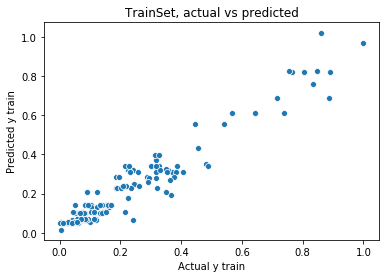

In [74]:
sns.scatterplot(y_train,y_train_pred)
plt.xlabel('Actual y train')
plt.ylabel('Predicted y train')
plt.title("TrainSet, actual vs predicted")
plt.show()

### Observation
<div class="alert alert-block alert-success">Plot above shows that our model has fitted good, since the line has fitted correctly covering most of the data points

### Variation Coverage Plot 

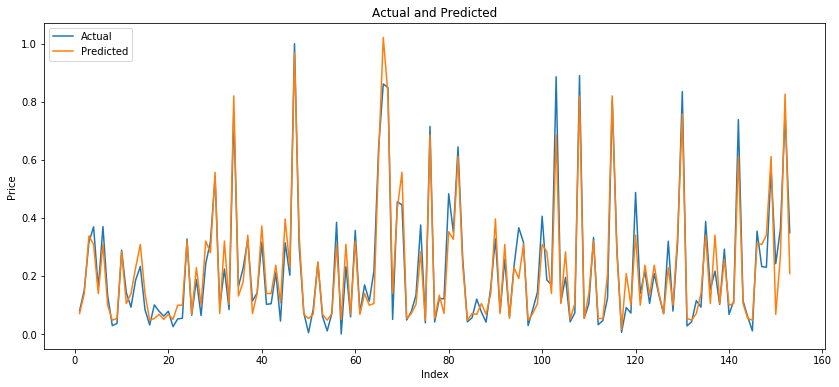

In [75]:
c = [i for i in range(1,y_train.shape[0]+1,1)]
plt.figure(figsize=[14,6])
plt.plot(c,np.array(y_train),label='Actual')
plt.plot(c,np.array(y_train_pred),label='Predicted')
plt.legend(loc="upper left")
plt.title('Actual and Predicted')
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

### Observation
<div class="alert alert-block alert-success"> We can see in the above plot, that the predicted values are almost overlapping the actual values

## Error Terms

### Normal Distribution of Residuals

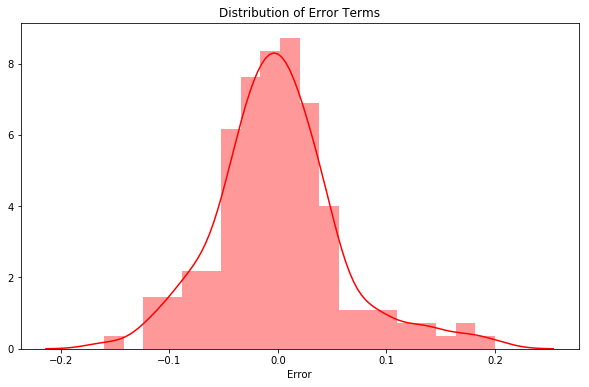

In [76]:
plt.figure(figsize=[10,6])
sns.distplot((y_train-y_train_pred),bins=20,color='r')
plt.title("Distribution of Error Terms")
plt.xlabel("Error")
plt.show()

### Observation
<div class="alert alert-block alert-success">We see that the errors are Normally Distributed. Also there is no multicollinearity between variables 

### Variance in Error Terms

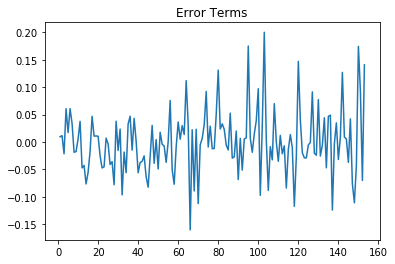

In [77]:
c = [i for i in range(1,y_train.shape[0]+1,1)]
plt.title("Error Terms")
plt.plot(c,np.array(y_train-y_train_pred))
plt.show()

### Observation
<div class="alert alert-block alert-success">As you can see in the image above, the error terms evenly distributed across y=0 which is ideal. Also you can see there is no pattern observed. 

### QQ Plot of Residuals

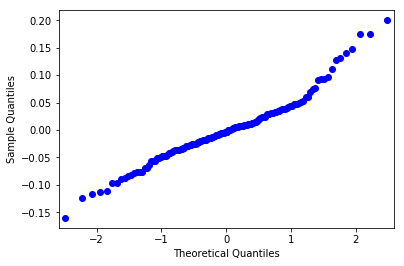

In [78]:
# Get the residuals
res = linear_model_sm.resid
# Plot the residuals using qq plot
fig = sm.qqplot(res)
plt.show()

### Observation
<div class="alert alert-block alert-success">plot above looks good and indicates normal distribution of residuals as it almost formed a straight line. </div>

## Inference
<div class="alert alert-block alert-info">Hence we can conclude with above inferences that assumptions of Linear regression problem holds good </div

# Evaluation Of Model

<div class="alert alert-block alert-info"> Predict values on X_test

In [79]:
# Add constant
X_test_sm = sm.add_constant(X_test[related_columns1])
# create linear model
y_test_pred = linear_model_sm.predict(X_test_sm)
y_test_pred.head()

52     0.050416
181    0.251115
5      0.326132
18    -0.035599
188    0.102024
dtype: float64

### Actual vs Predicted on TestSet
<div class="alert alert-block alert-info">Let's now draw <b>scatter plot</b> the graph for actual versus predicted values.

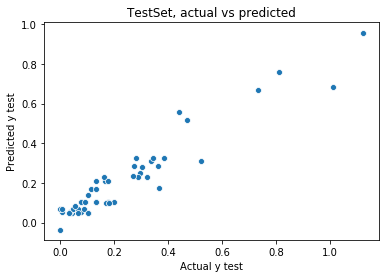

In [80]:
# scatter plot y test vs y train
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('Actual y test')
plt.ylabel('Predicted y test')
plt.title("TestSet, actual vs predicted")
plt.show()

### Observation
<div class="alert alert-block alert-success">Scatter plot for actual y test vs predicted y test, shows that most of the data points lies on straight line. Hence we can conclude that our model has fitted good and is able to predict good on the newer data points which were not trained. 

### Coverage of Variation in testset by Model

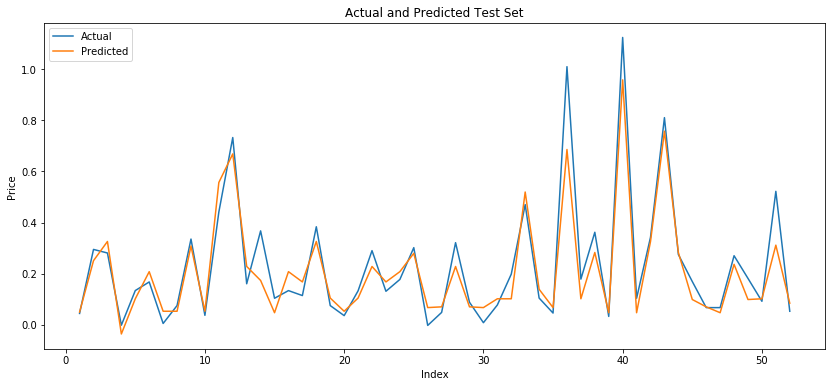

In [81]:
# Intitialize array with 1-max 
c = [i for i in range(1,y_test.shape[0]+1,1)]
plt.figure(figsize=[14,6])
# Plot actual values
plt.plot(c,np.array(y_test),label='Actual')
# Plot predicted values
plt.plot(c,np.array(y_test_pred),label='Predicted')
# indicate the legends 
plt.legend(loc="upper left")
plt.title('Actual and Predicted Test Set')
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

### Observation
<div class="alert alert-block alert-success">The above graphs shows that the variation in actual values(represented in blues) is almost explained by predicted values (represented by orange)

# R2 Score

### R2 Score on Train Set

In [82]:
round(r2_score(y_train,y_train_pred),2)

0.93

### R2 Score on Test Set

In [83]:
round(r2_score(y_test,y_test_pred),2)

0.89

### Observation
<div class="alert alert-block alert-success">We see that accuracy on train set and test set are very close(difference of 4). Hence are our model hasn't overfitted and has fitted properly

# Mean Square Error

In [84]:
# Mean Square Error of train set
mse_train = mean_squared_error(y_train, y_train_pred)
round(mse_train,2)

0.0

In [85]:
# Mean Square Error of test set
mse_test = mean_squared_error(y_test, y_test_pred)
round(mse_test,2)

0.01

### Observation
<div class="alert alert-block alert-success"> We see that Mean square error of the train and test set is almost zero. Hence We can say that accuracy of model created is good.

# Final Equation of our best fitted Line

In [86]:
# Get the coefficients and store it in dictionary 
param = linear_model_sm.params
param.to_dict()

{'const': -0.009794354519002216,
 'enginesize': 0.7339880848773064,
 'rear': 0.1772501491779892,
 'rotor': 0.238365742159519,
 'peugeot': -0.05189196926165163,
 'Mid variant': 0.14669489237467095,
 'Luxury': 0.29717810041792864}

In [87]:
# Lets print in the form of equation
print(' + '.join(['('+str(round(i[1],2))+')'+' x '+i[0] for i in param.items()]))

(-0.01) x const + (0.73) x enginesize + (0.18) x rear + (0.24) x rotor + (-0.05) x peugeot + (0.15) x Mid variant + (0.3) x Luxury


### Observation
<div class="alert alert-block alert-warning">Final Equation of best fit line
$ Car price = (-0.01) + (0.73) \times enginesize + (0.18) \times rear + (0.24) \times rotor + (-0.05) \times peugeot + (0.15) \times Mid variant + (0.3) \times Luxury $

# Conclusion
1. We see that, the following factors impact the price of cars in USA Automobile Market. Hence the chinese company can understand what all factors that they can consider to build car for US Marker. 
    - Engine Size 
    - rear 
    - rotor
    - peugeot(negative)
    - Mid Variant
    - Luxury
2. Also for the variables above, we reject the Null Hypothesis(Variable is not related).
3. Hence the chinese automobile company can make use of the above linear equation to forecast the price of the Car that they manufacture. And automatically tune the configurations of car to give a tough competition to the competitors in the market.